## Dragon Real Estage - Price predecctor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("./DragonRealEstate_data/Data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [8]:
housing['TAX'].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: TAX, Length: 66, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

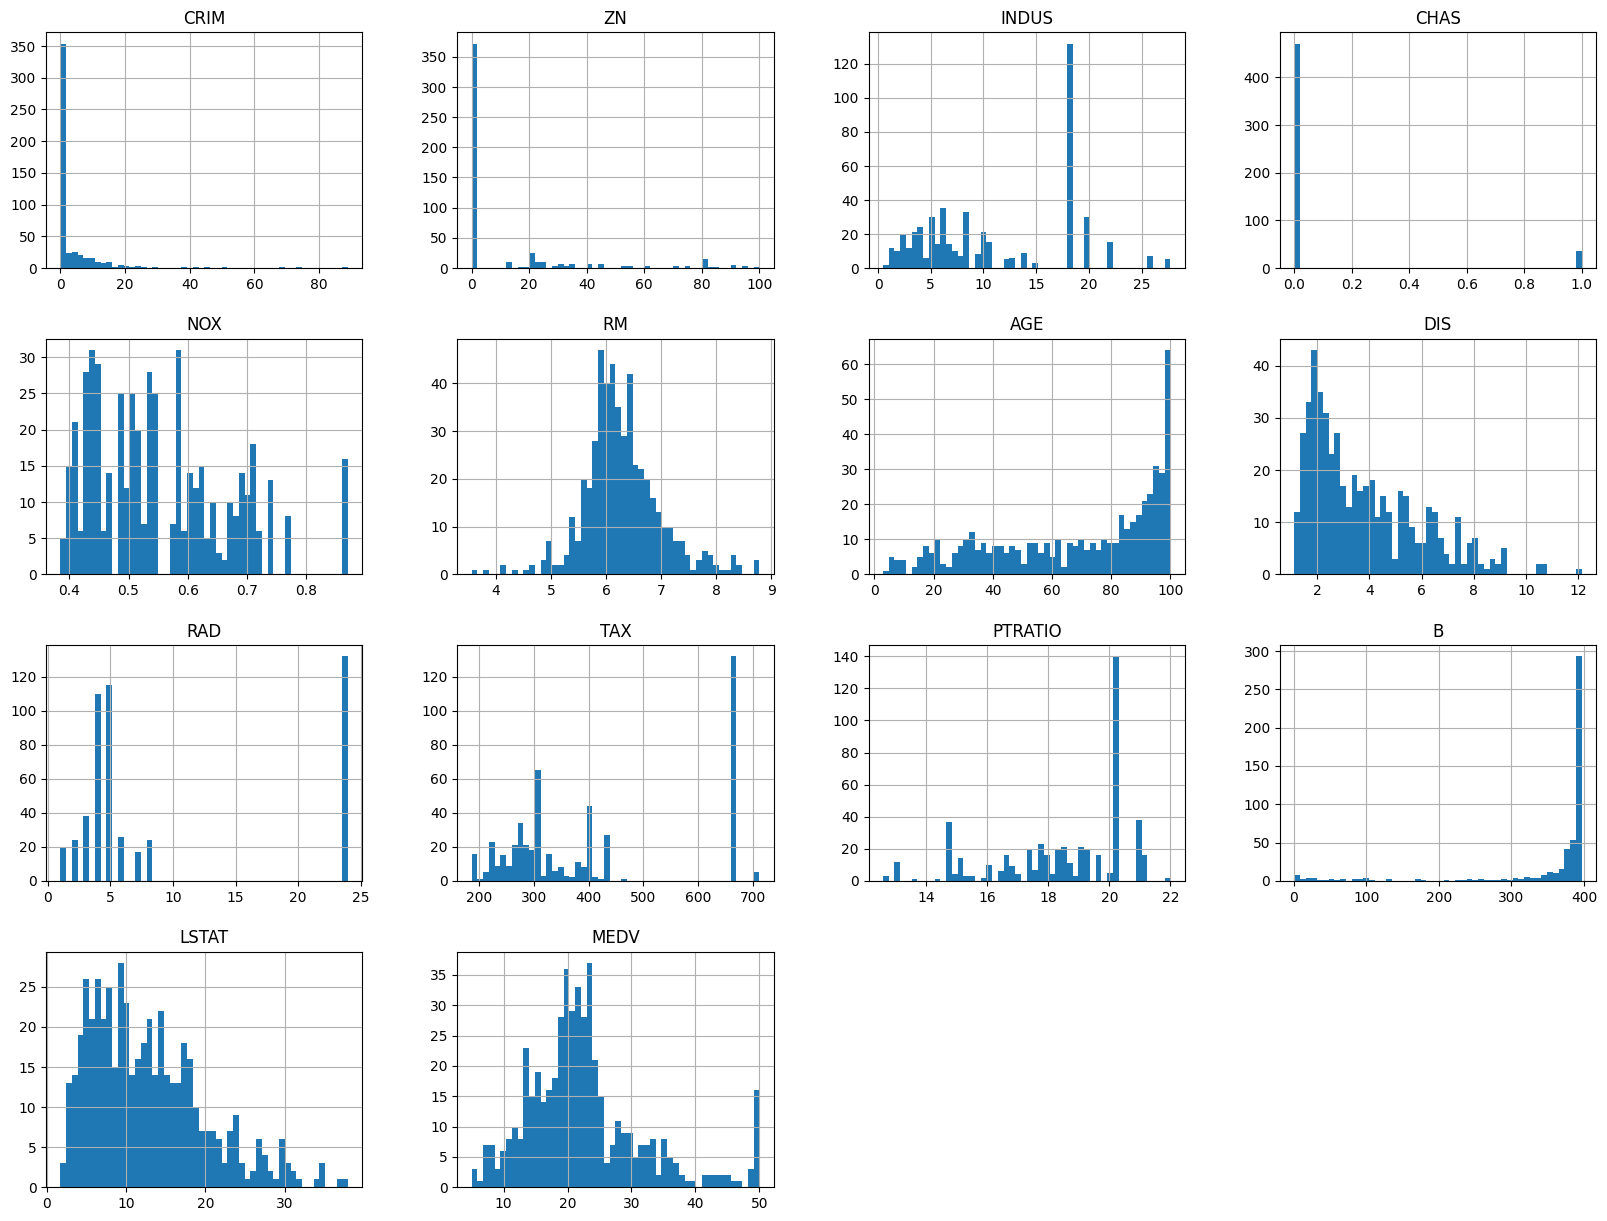

In [12]:
housing.hist(bins = 50, figsize=(20, 15))
plt.show()

### Train test splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [17]:
for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [18]:
start_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
start_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

### Looking for Correlation

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
corr_matrix['MEDV']  # Here - 'MEDV' is the target variable

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

In [25]:
attribures = ["MEDV", "RM", "ZN","LSTAT"]

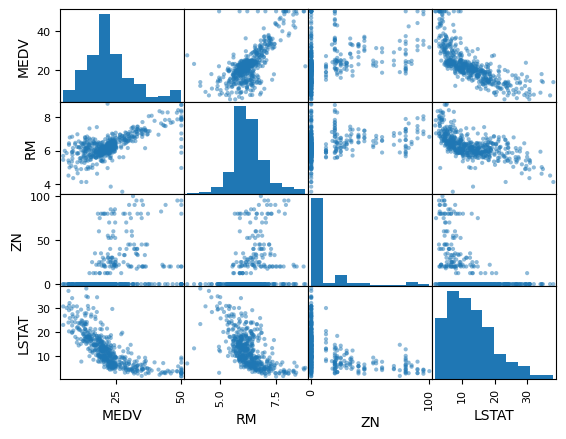

In [26]:
scatter_matrix(housing[attribures])
plt.show()

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

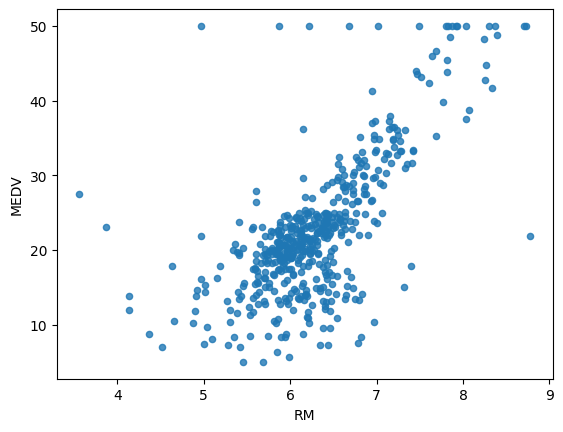

In [27]:
housing.plot(kind ="scatter", x = "RM",y = "MEDV" , alpha = 0.8)

### Tryingout other attribute combinations

In [28]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [29]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'TAXRM'],
      dtype='object')

In [30]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [31]:
corr_matrix_2 = housing.corr()

In [32]:
corr_matrix_2['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

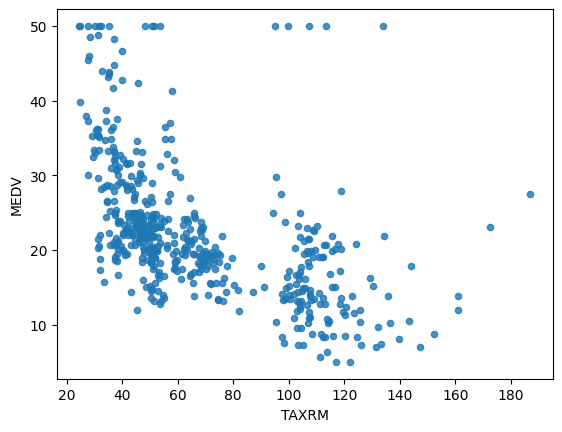

In [33]:
housing.plot(kind = 'scatter', x = 'TAXRM', y = 'MEDV', alpha = 0.8)
plt.show()

In [34]:
## Missing attributes

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  TAXRM    506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


### Handeling missing values

In [36]:
# Remove the records of missing values
# Get rid the attrivute completely
# Use the imputation

In [38]:
a = housing.dropna(subset=["RM"]) # Option 1
a.shape

(506, 15)

In [40]:
b = housing.drop("RM", axis=1) # It remove the "RM" comumn compltely
b.shape

(506, 14)

In [41]:
b

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [42]:
# Option 3 - Imputation => Use median imputation

median = housing["RM"].median()

In [43]:
housing["RM"].fillna(median)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [44]:
housing.shape

(506, 15)

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20850000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [55]:
X  = imputer.transform(housing)

In [56]:
X.shape

(506, 15)

In [57]:
type(X)

numpy.ndarray

In [58]:
X

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        4.98000000e+00, 2.40000000e+01, 4.50190114e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        9.14000000e+00, 2.16000000e+01, 3.76888335e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        4.03000000e+00, 3.47000000e+01, 3.36812804e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        5.64000000e+00, 2.39000000e+01, 3.91341743e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        6.48000000e+00, 2.20000000e+01, 4.01825140e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        7.88000000e+00, 1.19000000e+01, 4.52736318e+01]])

In [59]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [60]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,40.182514


In [61]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.742592
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.352087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.569765
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.591417
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Scikit-learn Design

Primarily there are 3 types of objects

1. Estimators: It estimates some parameters baed on the dataset. Example: Imputer - It has Fit and transform methods. Fit => Fits the dataset and calculates the internal parameters

2. Transformers: Transform method takes the input and returns the output  baed on the learnig from fit() method. It also has convenience function called fit_transform() which fits and transforms the dataset

3. Preditors: LinearRegression model is an example of preddictor. fit() and predcit() are two common functions. It also has score() function which will evaluate the predections.

## Feature scaling

Primarily there are two types of feature scaling methods

Common types:

1. Min-Max scaling (Normalization) => (value - min)/(max-min)
   sklearn proivdes => MinMaxScalar class for this purpose
   
2. Standardadization => (value-mean)/std
    sklearn provides => StandardScalar class for this purpose

In [114]:
housing_raw = housing.drop(["TAXRM"], axis=1)

## Creating Pipeline

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scalar', StandardScaler())
])

In [118]:
housing_num_tr = my_pipeline.fit_transform(housing_raw)

In [119]:
housing_num_tr

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [108]:
housing_num_tr.shape

(506, 14)

In [109]:
housing_label = housing["MEDV"]

In [110]:
housing_label

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [111]:
housing_data = housing.drop(["MEDV", "TAXRM"], axis=1)

In [112]:
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [113]:
housing_raw = housing.drop(["TAXRM"], axis=1)

In [101]:
housing_raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Selecting a desired model for Dragon Real Estates 

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [120]:
housing_num_tr

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [121]:
housing_num_tr.shape

(506, 14)

In [122]:
model.fit(housing_num_tr, housing_label)

LinearRegression()

In [125]:
some_data = housing_raw.iloc[:5]

In [126]:
some_labels = housing_label.iloc[:5]

In [129]:
prepared_data = my_pipeline.transform(some_data)

In [130]:
model.predict(prepared_data)

array([24. , 21.6, 34.7, 33.4, 36.2])

In [132]:
list(some_labels)

[24.0, 21.6, 34.7, 33.4, 36.2]

In [133]:
## Evaluating the model

In [134]:
from sklearn.metrics import mean_squared_error

housing_predections = model.predict(housing_num_tr)

In [135]:
lin_mse = mean_squared_error(housing_label, housing_predections)

In [137]:
import numpy as np
lin_rmse = np.sqrt(lin_mse)

In [138]:
lin_mse

1.2732339731358864e-27

In [139]:
lin_rmse

3.56824042510575e-14

In [141]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
model_DTR = DecisionTreeRegressor()

In [143]:
housing_predections = model_DTR.predict(housing_num_tr)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Using cross validation

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_raw, housing_label, scoring="neg_mean_squared_error", cv=10)

In [149]:
rmse_scores = np.sqrt(-scores)

In [150]:
rmse_scores

array([1.97336987e-14, 8.11745572e-15, 4.17756844e-14, 3.92031460e-14,
       1.72116377e-14, 1.63033653e-14, 1.40410868e-14, 9.10211727e-14,
       7.03129967e-14, 2.78293385e-14])